# Bank Marketing Campaign  Analysis
 

In [68]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [69]:
df=pd.read_csv("../Dataset/Bank.csv")

In [70]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# 1. Data Preparation:

In [71]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Hown to handle missing values in the dataset ?

In [72]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Convert Data Types if Needed?

In [73]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

# 2. Exploratory Data Analysis (EDA):

**What is the distribution of key features (age, job, marital status, etc.)?**

In [74]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [75]:
df.value_counts('job')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [76]:
df.value_counts('marital')

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [77]:
df.value_counts('contact')

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [78]:
df.value_counts('education')

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [79]:
df.value_counts('default')

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [80]:
df.value_counts('housing')

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [81]:
df.value_counts('loan')

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [82]:
df.value_counts('month')

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [83]:
df.value_counts('day_of_week')

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [84]:
df.value_counts('poutcome')

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

###  Which customer profiles (job, education, etc.) have higher subscription rates?

In [85]:
a = df.groupby('job')['y'].value_counts(normalize=True).unstack()*100
a

y,0,1
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


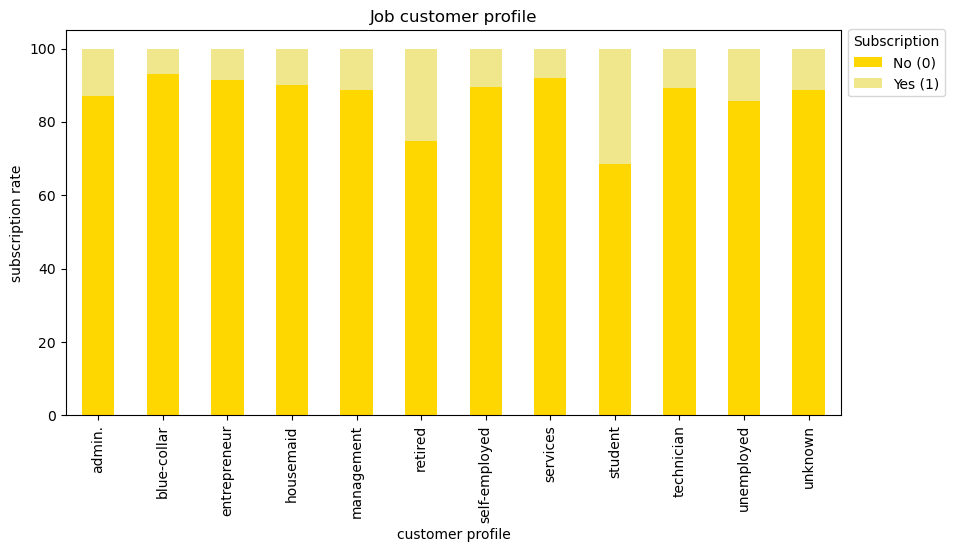

In [86]:
a.plot(kind='bar',stacked=True,figsize=(10,5),color=['gold','khaki'])
plt.title('Job customer profile')
plt.xlabel('customer profile')
plt.ylabel('subscription rate')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.xticks(rotation=90)
plt.show()

In [87]:
b = df.groupby('education')['y'].value_counts(normalize=True).unstack()*100
b

y,0,1
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


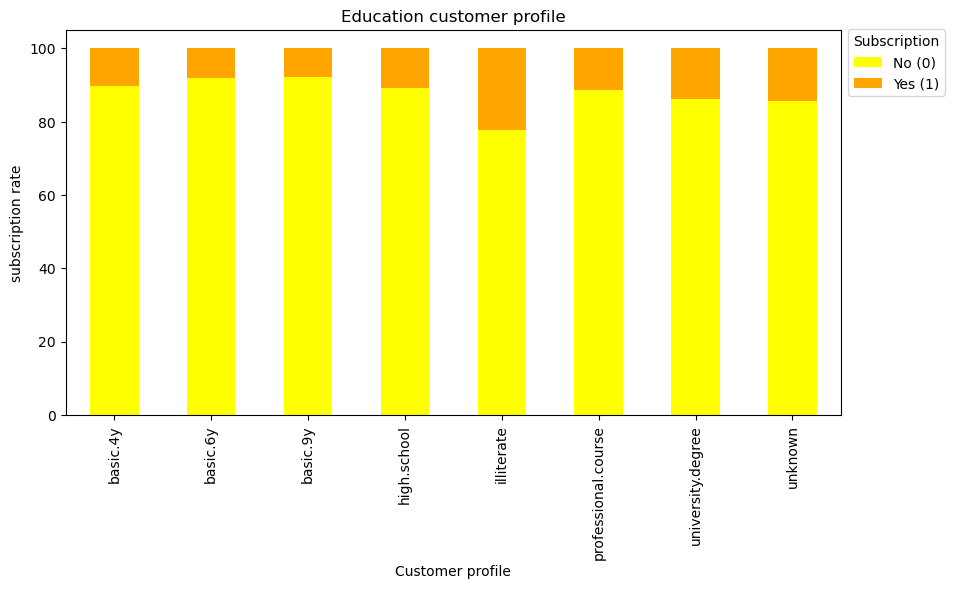

In [88]:
b.plot(kind='bar',stacked=True,figsize=(10,5),color=['yellow','orange'])
plt.title('Education customer profile')
plt.xlabel('Customer profile')
plt.ylabel('subscription rate')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.xticks(rotation=90)
plt.show()

### What are the relationships between input features and the target variable?

In [89]:
corr_matrix=df[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','euribor3m','y']].corr()

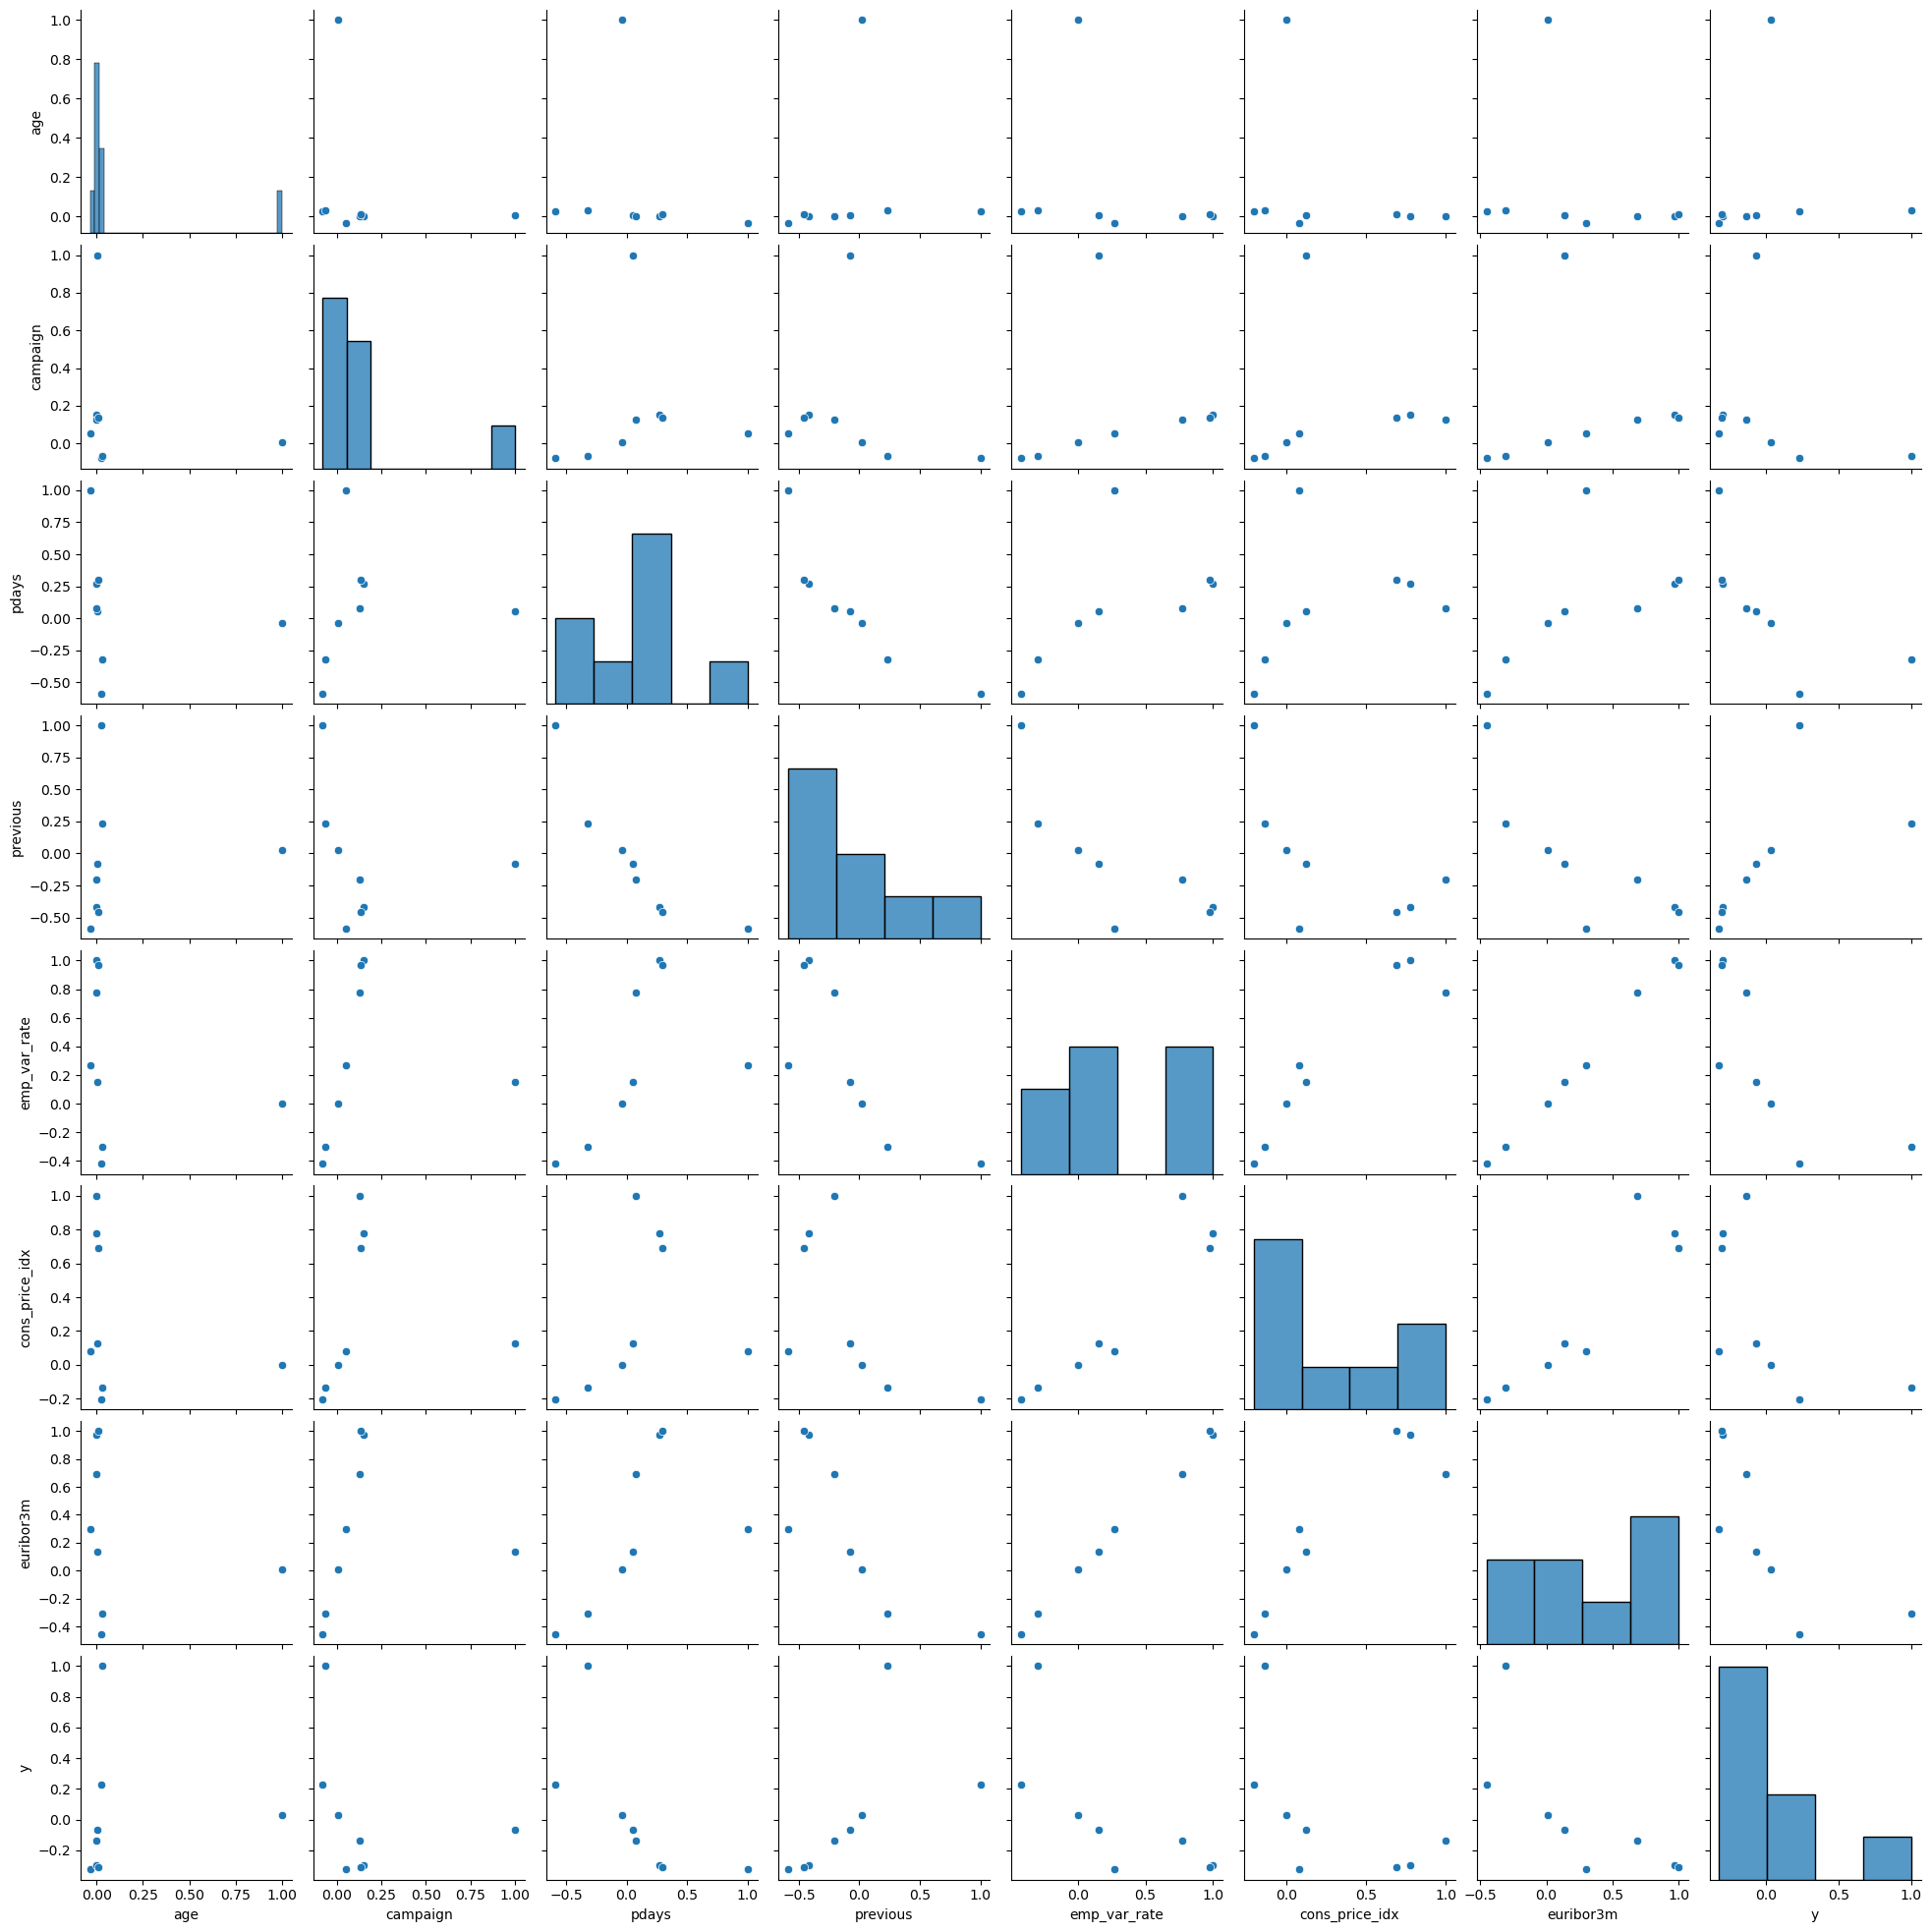

In [90]:
sb.pairplot(corr_matrix)
plt.show()

# 3.Client Profile Analysis:

### How do job, marital status, and education affect subscription decisions?

In [91]:
ab=df.groupby('job')['y'].value_counts(normalize=True).unstack()*100
ab

y,0,1
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


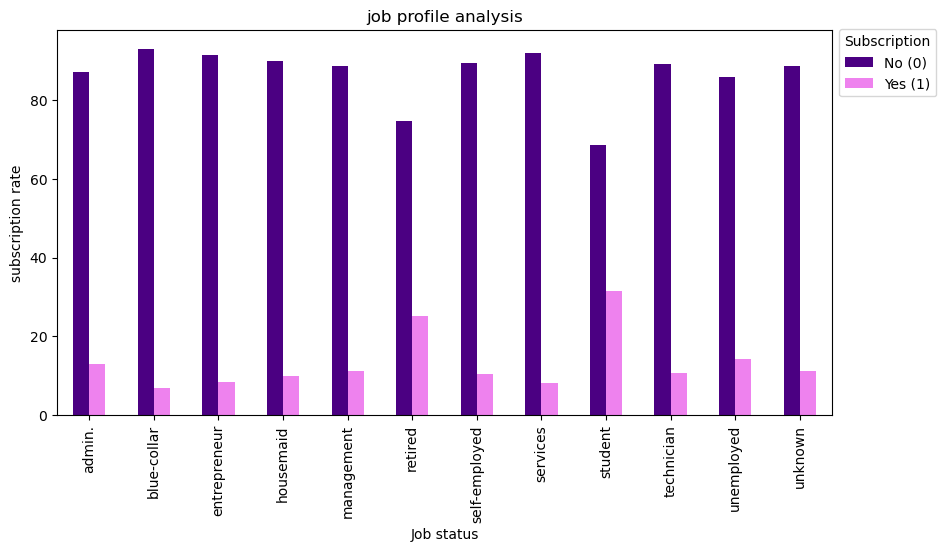

In [92]:
ab.plot(kind='bar',figsize=(10,5),color=['indigo','violet'])
plt.title('job profile analysis')
plt.xlabel('Job status')
plt.ylabel('subscription rate')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.xticks(rotation=90)
plt.show()

In [93]:
abc=df.groupby('marital')['y'].value_counts(normalize=True).unstack()*100
abc

y,0,1
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


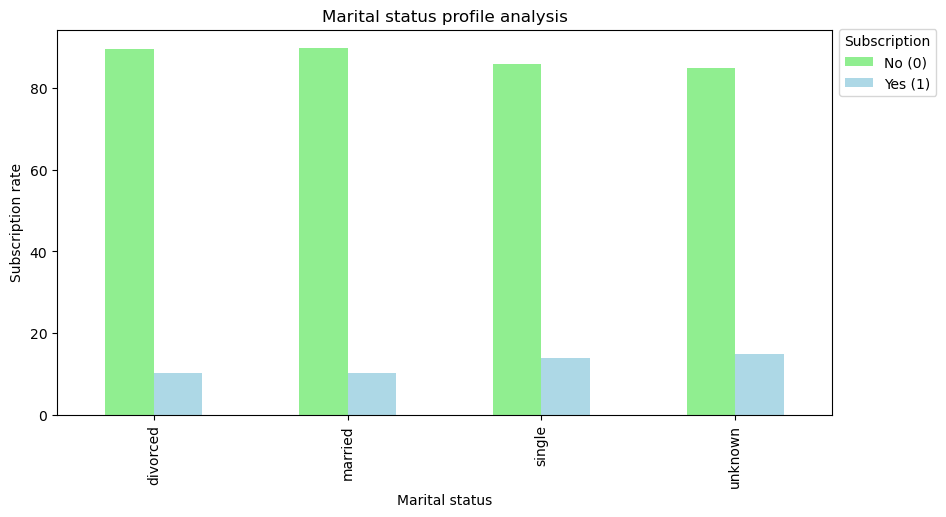

In [94]:
abc.plot(kind='bar',figsize=(10,5),color=['lightgreen','lightblue'])
plt.title('Marital status profile analysis')
plt.xlabel('Marital status')
plt.ylabel('Subscription rate')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.xticks(rotation=90)
plt.show()

In [95]:
c=df.groupby('education')['y'].value_counts(normalize=True).unstack()*100

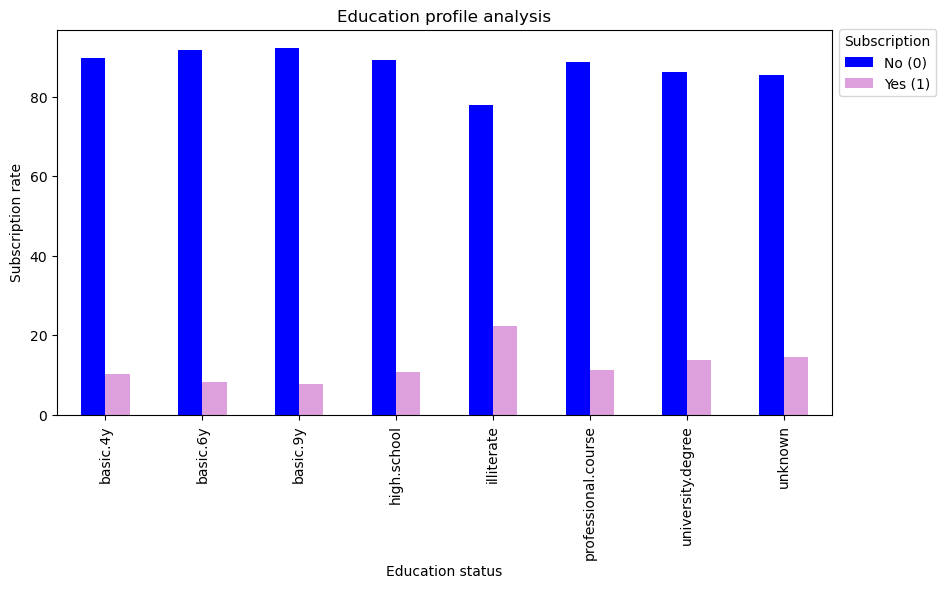

In [96]:
c.plot(kind='bar',figsize=(10,5),color=['blue','plum'])
plt.title('Education profile analysis')
plt.xlabel('Education status')
plt.ylabel('Subscription rate')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.xticks(rotation=90)
plt.show()

# 4. Campaign Effectiveness:

### Does the duration of the call increase the chances of a successful subscription?

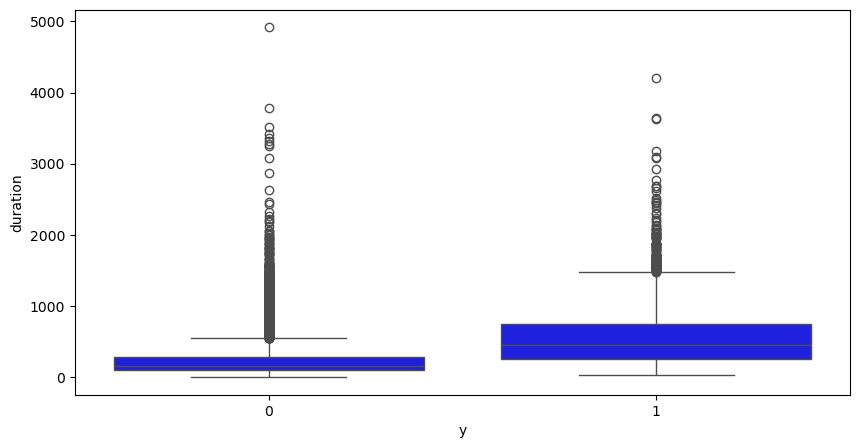

In [97]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df.y, y=df.duration,color='blue')
plt.show()

## Which contact methods (e.g., telephone, cellular) are most effective?

In [98]:
e=df.groupby('contact')['y'].value_counts(normalize=True).unstack()*100
e

y,0,1
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


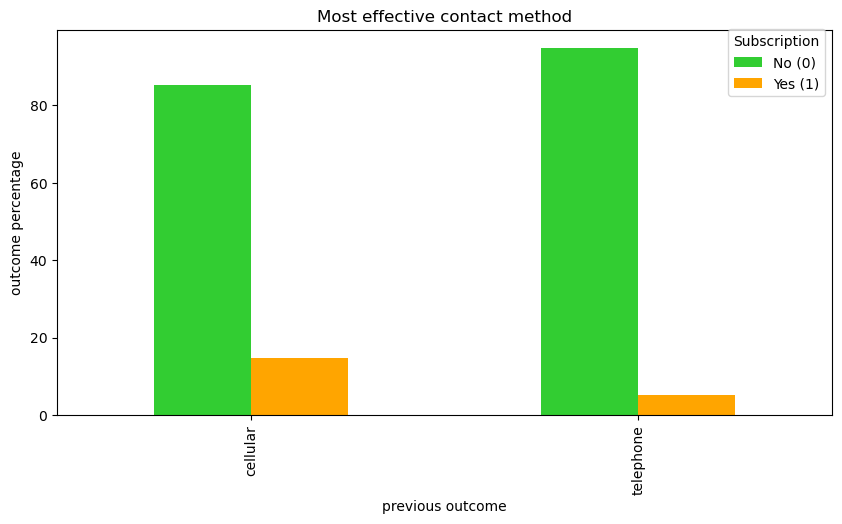

In [99]:
e.plot(kind='bar',figsize=(10,5),color=['limegreen','orange'])
plt.title('Most effective contact method')
plt.xlabel('previous outcome')
plt.ylabel('outcome percentage')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.show()

 ## How many contacts are usually needed before a client subscribes?

In [100]:
dc=df.groupby('y')['campaign'].mean()
dc

y
0    2.633085
1    2.051724
Name: campaign, dtype: float64

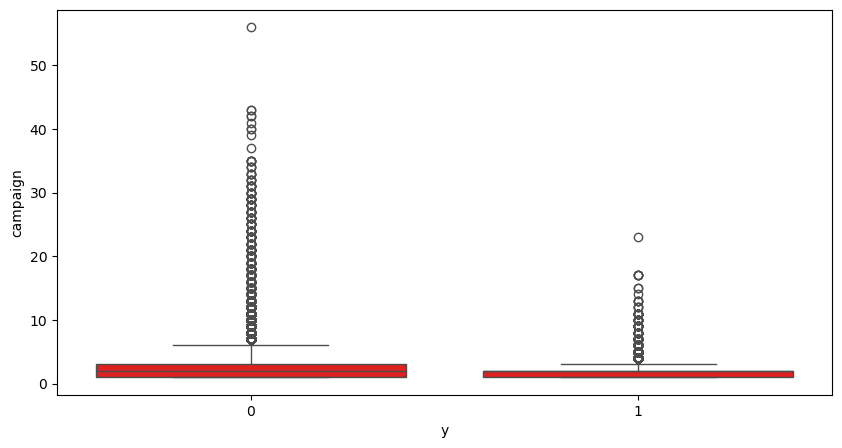

In [101]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df.y, y=df.campaign,color='Red')
plt.show()

# 5. Previous Campaign Impact:

## How doesn the outcome of previous campaigns influence the current one?

In [102]:
 xy=df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()*100
xy

y,0,1
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


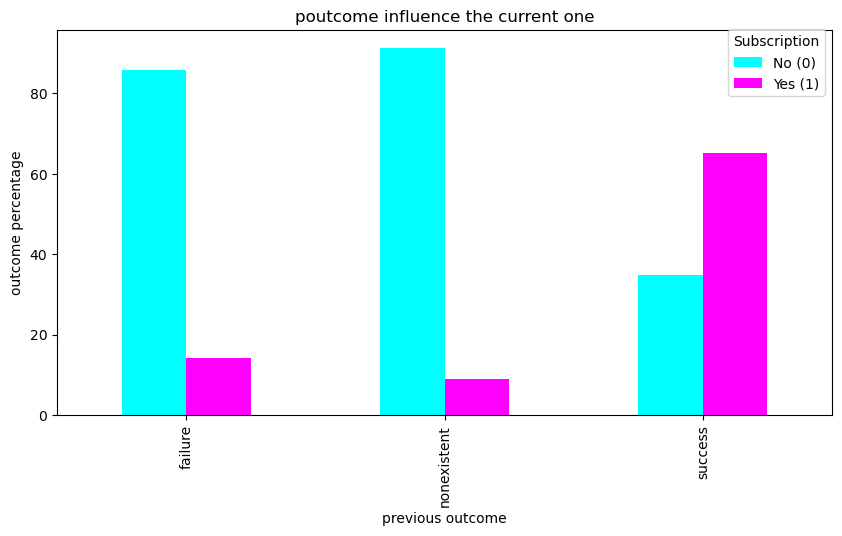

In [103]:
xy.plot(kind='bar',figsize=(10,5),color=['cyan','magenta'])
plt.title('poutcome influence the current one')
plt.xlabel('previous outcome')
plt.ylabel('outcome percentage')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.show()

### Does having prior contact with a client increase the chance of success?

In [104]:
mn=df.groupby('previous')['y'].value_counts(normalize=True).unstack() * 100
mn

y,0,1
previous,,
0,91.167787,8.832213
1,78.798509,21.201491
2,53.580902,46.419098
3,40.740741,59.259259
4,45.714286,54.285714
5,27.777778,72.222222
6,40.000000,60.000000
7,100.000000,NaN


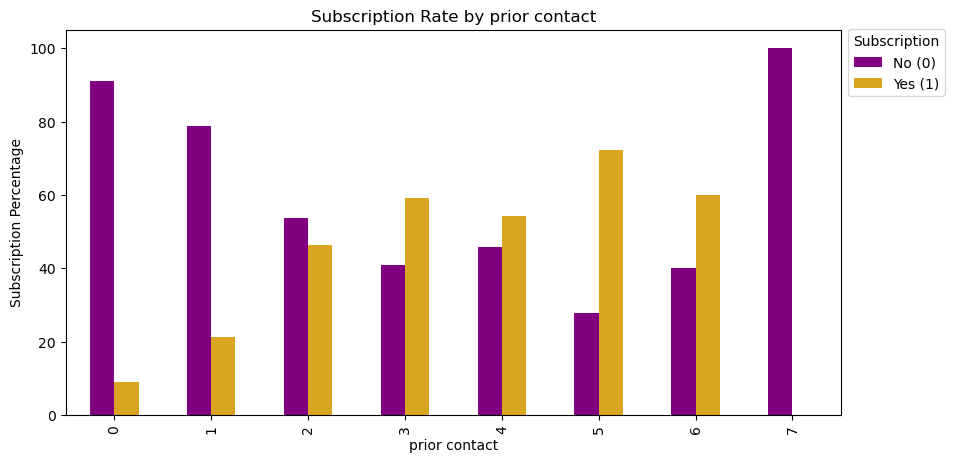

In [105]:
mn.plot(kind='bar',figsize=(10,5),color=['purple','goldenrod'])
plt.title('Subscription Rate by prior contact')
plt.xlabel('prior contact')
plt.ylabel('Subscription Percentage')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.show()

# 6. Temporal Analysis:

## Which months have higher subscription rates?

In [106]:
 bh=df.groupby('month')['y'].value_counts(normalize=True).unstack()*100
bh=bh.reset_index()
bh

y,month,0,1
0,apr,79.521277,20.478723
1,aug,89.397863,10.602137
2,dec,51.098901,48.901099
3,jul,90.953443,9.046557
4,jun,89.488530,10.511470
5,mar,49.450549,50.549451
6,may,93.565255,6.434745
7,nov,89.856133,10.143867
8,oct,56.128134,43.871866
9,sep,55.087719,44.912281


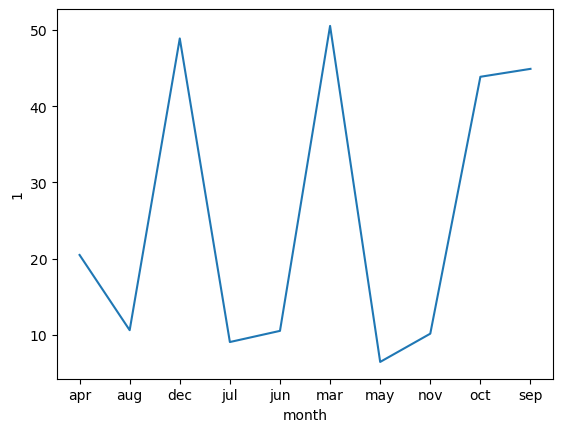

In [107]:
sb.lineplot(x=bh.month,y=bh[1])
plt.show()

### Is there any effect of the day of the week on subscription success?

In [108]:
 abcd=df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()*100
abcd

y,0,1
day_of_week,,
fri,89.191261,10.808739
mon,90.051680,9.948320
thu,87.881248,12.118752
tue,88.220025,11.779975
wed,88.332924,11.667076


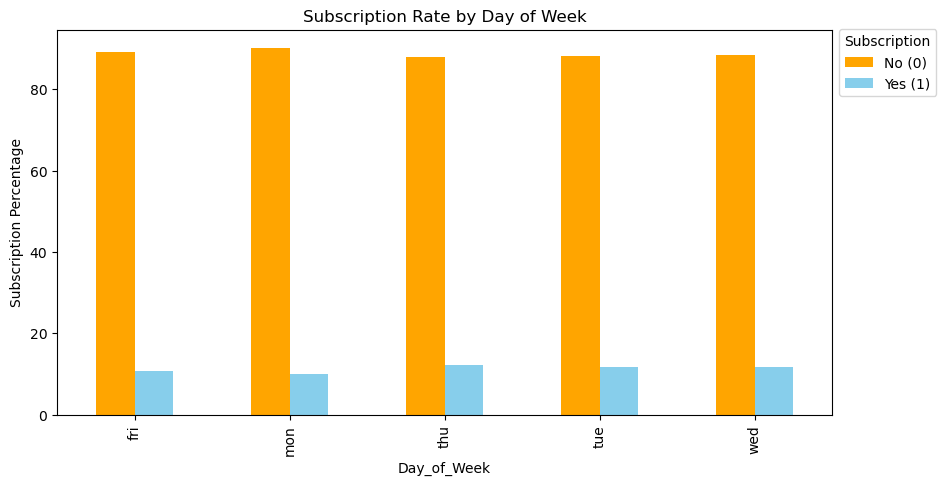

In [111]:
abcd.plot(kind='bar',figsize=(10,5),color=['orange','skyblue'])
plt.title('Subscription Rate by Day of Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Subscription Percentage')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.0,1.02))
plt.show()